## 1. Import rollingsales_manhattan.csv as a DataFrame

In [1]:
import pandas as pd 

data = pd.read_csv('../data/raw/rollingsales_manhattan.csv', skiprows=4, skip_blank_lines=True) 
data.dropna(how="all", inplace=True)

data_frame = data.replace(',', '', regex=True)

data_frame = pd.DataFrame(data)


print(data_frame.head())

   BOROUGH   NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      1.0  ALPHABET CITY  01 ONE FAMILY DWELLINGS                    1   
1      1.0  ALPHABET CITY  01 ONE FAMILY DWELLINGS                    1   
2      1.0  ALPHABET CITY  02 TWO FAMILY DWELLINGS                    1   
3      1.0  ALPHABET CITY  02 TWO FAMILY DWELLINGS                    1   
4      1.0  ALPHABET CITY  02 TWO FAMILY DWELLINGS                    1   

   BLOCK   LOT  EASE-MENT BUILDING CLASS AT PRESENT              ADDRESS  \
0  376.0  43.0        NaN                        S1  743 EAST 6TH STREET   
1  400.0  19.0        NaN                        A4  526 EAST 5TH STREET   
2  404.0   1.0        NaN                        B9         166 AVENUE A   
3  404.0   1.0        NaN                        B9         166 AVENUE A   
4  404.0   1.0        NaN                        B9         166 AVENUE A   

  APARTMENT NUMBER  ...  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0              

In order to make the initial import usable, I inserted keyward argument. One of the major issues was there were unnecessary rows at the very beginning, which was not part of the data. To avoid reading those lines, I used the skiprows argument so that panda skips those lines. Furthermore, I inserted another argument, which is skip_blank_lines. This argument made the reading process to stop once it starts to see blank rows.

## 2. Display columns and row samples

In [ ]:
print(data_frame.columns.tolist())

In [ ]:
first_five_rows = data_frame.head(5)
print(first_five_rows)

In [ ]:
shuffled_rows = data_frame.sample(frac=1)
print(shuffled_rows.head(5))

In [ ]:
last_five_rows= data_frame.tail(5)
print(last_five_rows)

## 3. Describe the rows and data types

In [ ]:
print(data_frame.info(verbose=True))

list out the columns that look like they have the "wrong" (or too wide) type

LAND SQUARE FEET - should be (float64)
GROSS SQUARE FEET - should be (float64)
SALE PRICE - should be (int64)

On the below cell, I have written any data transformations or cleaning, which I thought were needed.

In [3]:
data_frame = data_frame.replace(',','', regex=True)
data_frame[" SALE PRICE "] = pd.to_numeric(data_frame[" SALE PRICE "])
data_frame["LAND SQUARE FEET"] = pd.to_numeric(data_frame["LAND SQUARE FEET"])
data_frame['GROSS SQUARE FEET'] = data_frame['GROSS SQUARE FEET'].fillna(0)
data_frame = data_frame.astype({"GROSS SQUARE FEET": int})
print(data_frame.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17159 entries, 0 to 17158
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         17159 non-null  float64
 1   NEIGHBORHOOD                    17159 non-null  object 
 2   BUILDING CLASS CATEGORY         17159 non-null  object 
 3   TAX CLASS AT PRESENT            17088 non-null  object 
 4   BLOCK                           17159 non-null  float64
 5   LOT                             17159 non-null  float64
 6   EASE-MENT                       0 non-null      float64
 7   BUILDING CLASS AT PRESENT       17088 non-null  object 
 8   ADDRESS                         17159 non-null  object 
 9   APARTMENT NUMBER                8213 non-null   object 
 10  ZIP CODE                        17088 non-null  float64
 11  RESIDENTIAL UNITS               1783 non-null   float64
 12  COMMERCIAL UNITS                

## 4. Initial column (or row) clean-up

In [4]:
print(data_frame.info(verbose=True))
print(data_frame['BOROUGH'].values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17159 entries, 0 to 17158
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         17159 non-null  float64
 1   NEIGHBORHOOD                    17159 non-null  object 
 2   BUILDING CLASS CATEGORY         17159 non-null  object 
 3   TAX CLASS AT PRESENT            17088 non-null  object 
 4   BLOCK                           17159 non-null  float64
 5   LOT                             17159 non-null  float64
 6   EASE-MENT                       0 non-null      float64
 7   BUILDING CLASS AT PRESENT       17088 non-null  object 
 8   ADDRESS                         17159 non-null  object 
 9   APARTMENT NUMBER                8213 non-null   object 
 10  ZIP CODE                        17088 non-null  float64
 11  RESIDENTIAL UNITS               1783 non-null   float64
 12  COMMERCIAL UNITS                

In [ ]:
del data_frame['BOROUGH']
del data_frame['EASE-MENT']

The intended use of column 'BOROUGH' was to show name of the borough in which the property is located. However, the only value this column contains is 1. Thus, I thought that this column was unnecessary. 

Another column I thought unnecessary was column 'EASE-MENT.' This column does not contain any value in all the rows. Thus, this column would be unnecessary.

In [ ]:
data_frame.rename(columns={'LOT':'PROPERTY UNIQUE LOCATION'}, inplace=True)

I thought that the Column 'LOT' should be renamed to more self explanatory name because it was very unclear what the column is representing by solely looking at the column name.

## 5. Determine the top three neighborhoods that had the most properties sold (no need to calculate units, the actual number of properties is adequate)

In [5]:
print(data_frame.NEIGHBORHOOD.value_counts().head(3))

UPPER EAST SIDE (59-79)    1696
UPPER EAST SIDE (79-96)    1629
UPPER WEST SIDE (59-79)    1499
Name: NEIGHBORHOOD, dtype: int64


In order to determine the top three neighborhoods that had the most properties sold, I used the value_counts method. Value_counts method basically returns series containing counts of unique or distinct values in descending order. By using the head method at the end, I only extracted top 3 neighborhoods. 

## 6. Describe the kind of buildings that were sold

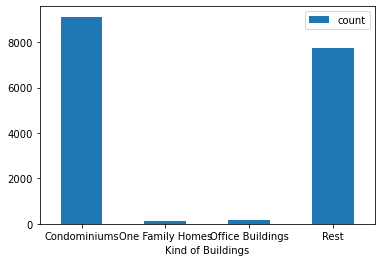

In [55]:
building_class = data_frame['BUILDING CLASS AT TIME OF SALE'].str[:1].value_counts()

count_of_R = building_class['R']
count_of_A = building_class['A']
count_of_O = building_class['O']

new_series_without_rao   = building_class.drop(['R', 'A', 'O']);
count_of_rest = new_series_without_rao.sum()

df = pd.DataFrame({'Kind of Buildings':['Condominiums', 'One Family Homes', 'Office Buildings', 'Rest'], 'count':[count_of_R, count_of_A, count_of_O, count_of_rest]})
ax = df.plot.bar(x='Kind of Buildings', y='count', rot=0,  alpha=1.0)

To visualize the kinds of buildings that were wold, several steps had to be taken. First, I extracted the key column 'BUILDING CLASS AT TIME OF SALE' as a series using slice. Since the first character of the String value classified the value, slicing was the key method to extract the necessary information. This column contained all the necessary information I needed. For example, values that contained the letter R were associated with condominiums. Values that contained the letter A were associated with one family homes. And finally, values that contained the letter O were asssociated with office buildings.

Then I dropped the three indices(R, A, O) from the series. I calculated the sum of all the values in the series, which would ultimately give the count of all the indices excluding R, A, and O. I stored this number on a variable called count_of_rest. Afterwards, I used these datas to plot the counts as a bar graph.

## 7. Calculate summary statistics for the prices of properties sold for all of Manhattan and for a couple of select neighborhoods

In [20]:
print(data_frame[" SALE PRICE "].mean())
print(data_frame[" SALE PRICE "].median())
print(data_frame[" SALE PRICE "].max())
print(data_frame[" SALE PRICE "].min())
print(data_frame[" SALE PRICE "].quantile(0.25))
print(data_frame[" SALE PRICE "].quantile(0.75))

mean_top_two = data_frame.groupby(['NEIGHBORHOOD'])[[' SALE PRICE ']].mean().head(2)
print(mean_top_two)

median_top_two = data_frame.groupby(['NEIGHBORHOOD'])[[' SALE PRICE ']].median().head(2)
print(median_top_two)

max_top_two = data_frame.groupby(['NEIGHBORHOOD'])[[' SALE PRICE ']].max().head(2)
print(max_top_two)

min_top_two = data_frame.groupby(['NEIGHBORHOOD'])[[' SALE PRICE ']].min().head(2)
print(min_top_two)

quantile_twenty_five_top_two = data_frame.groupby(['NEIGHBORHOOD'])[[' SALE PRICE ']].quantile(0.25).head(2)
print(quantile_twenty_five_top_two)

quantile_seventy_five_top_two = data_frame.groupby(['NEIGHBORHOOD'])[[' SALE PRICE ']].quantile(0.75).head(2)
print(quantile_seventy_five_top_two)

3430214.7107640305
875000.0
2155000000
0
300000.0
2100000.0
                SALE PRICE 
NEIGHBORHOOD               
ALPHABET CITY  2.205347e+06
CHELSEA        5.571827e+06
                SALE PRICE 
NEIGHBORHOOD               
ALPHABET CITY      599000.0
CHELSEA           1035000.0
                SALE PRICE 
NEIGHBORHOOD               
ALPHABET CITY      82000000
CHELSEA           880000000
                SALE PRICE 
NEIGHBORHOOD               
ALPHABET CITY             0
CHELSEA                   0
                SALE PRICE 
NEIGHBORHOOD               
ALPHABET CITY        2500.0
CHELSEA            515000.0
                SALE PRICE 
NEIGHBORHOOD               
ALPHABET CITY     1150000.0
CHELSEA           2500000.0


Average price of properties sold for all of Manhattan: 3,430,214
Median price of properties sold for all of Manhattan: 875,000
Max price of properties sold for all of Manhattan: 2,155,000,000
Min price of properties sold for all of Manhattan: 0
25th Percentile price of properties sold for all of Manhattan: 300,000
75th Percentile price of properties sold for all of Manhattan: 2,100,000

Average price of properties sold for ALPHABET CITY: 2,205,347
Median price of properties sold for ALPHABET CITY: 599,000
Max price of properties sold for ALPHABET CITY: 82,000,000
Min price of properties sold for ALPHABET CITY: 0
25th Percentile price of properties sold for ALPHABET CITY: 2,500
75th Percentile price of properties sold for ALPHABET CITY: 1,150,000

Average price of properties sold for CHELSEA: 5,571,827
Median price of properties sold for CHELSEA: 1,035,000
Max price of properties sold for CHELSEA: 880,000,000
Min price of properties sold for CHELSEA: 0
25th Percentile price of properties sold for CHELSEA: 515,000
75th Percentile price of properties sold for CHELSEA: 2,500,000

To calculate the mean, median, max, min, 25th percentile, and 75th percentile value of properties sold for all of Manhattan, I used the pandas built-in functions .mean, .median, .max, .min, .quantile on the " Sale Price " column. This calculation returned corresponding values. 

To calculate the mean median, max, min, 25th percentile, and 75th percentile value of two specific neighbors, I grouped the Data frame by the "NEIGHBORHOOD" column. Then, I computed the required values using the built-in methods. A key aspect of this process is that I applied the built-in methods on the "SALE PRICE" column, which is grouped by "NEIGHBORHOOD". This way, it caculates the statistics based on neighborhoods. Finally, I used the head() method to only show statistics for two neighborhoods.

## 8. Bin the prices of properties sold

In [7]:
cut_grades = ['bin1', 'bin2', 'bin3', 'bin4', 'bin5']
cut_bins = [-1, 20000, 480000, 800000, 1800000, 2155000000]
dd = pd.cut(data_frame[' SALE PRICE '], bins=cut_bins, labels = cut_grades)
print(pd.value_counts(dd))

bin5    4847
bin4    4253
bin1    3880
bin3    2689
bin2    1490
Name:  SALE PRICE , dtype: int64


Some unusual aspects about the dataset's prices were that most of the data were skewed towards the opposite ends. There wasn't enough median values, which could possibliy affect the average of the dataset's prices.

Since there were lots of zeros from the beginning to the 25th percentile, this could possibly lower the average.

In order to fix this issue, we would need more median values. Furthermore, we could skip the rows where the sale price is zero. In fact, sale price of zero is impossible in the real world.

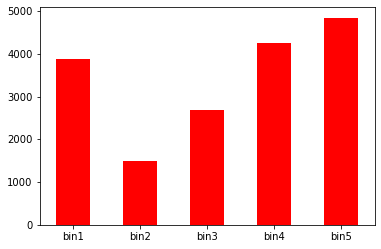

In [17]:
import matplotlib.pyplot as plt
graph = dd.value_counts(sort=False).plot.bar(rot=0, color="r", figsize=(6,4))
plt.show()

## 9. Create a visualization the shows the relationship (if any) between the price sold and the number of square footage of all the areas of a property within a building or a structure

In [9]:
column_1 = data_frame[" SALE PRICE "]
column_2 = data_frame["GROSS SQUARE FEET"]
correlation = column_1.corr(column_2)
print(correlation)

0.5344030166878669


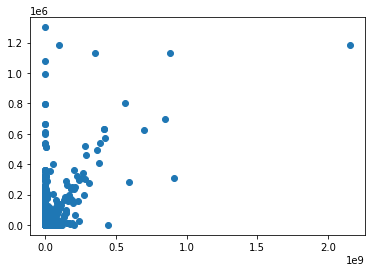

In [14]:
import matplotlib.pyplot as plt
plt.scatter(column_1, column_2) 
plt.show()

To determine whether there is any relationship between the sale price and the gross square feet, I decided to use the correlation method. Python contains the 'corr' method, which gives correlation between two lists. To experiment this process, I saved values of column "SALE PRICE" into column_1 and values of column "GROSS SQUARE FEET" into column_2. The result shows that the correlation between two variables is .5344. This indicates that the two variables have positive correlation. Positive correlation means that when one variable increases, the other variable increases. And finally, I used scatterplot to visualize the correlation between two variables.

## 10. which month did the least amount of sales occur

In [26]:
data_frame['SALE DATE'] = pd.to_datetime(data_frame['SALE DATE'])
print(data_frame['SALE DATE'].dt.month.value_counts())

6     2059
5     1667
12    1546
10    1539
4     1463
1     1438
9     1359
7     1343
3     1327
11    1260
2     1215
8      943
Name: SALE DATE, dtype: int64


To determine which month had the least amount of sales, I first converted the data type of column 'SALE DATE' to datetime. By doing this process, it will be much easier to extract month from the data object. Then, I used the .dt.month property of datetime object to extract only the month value from the 'SALE DATE' column. Finally, I used value_counts() method to obtain the occurrrences of each month. 

what can you conclude about when property sales reaches a lull?

Looking at the overall trend, there isn't a clear time period that shows lull property sales with the exception of August. August is the only time of the year that clearly showed decrease in number of property saels. Another trend that can be observed is that property sales seem to go down during fall. The average number of property sales is lower than that of other seasons.